## Uploading libraries and packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

* Resampling

In [3]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from IPython.display import Image
import seaborn as sns
from IPython.display import HTML, display
import tabulate

* Plots, tabs

In [4]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

* Others

In [330]:
from decimal import Decimal

* Standardization, pca analysis

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* Cross-Validation

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

* Train and Test

In [227]:
from sklearn.model_selection import train_test_split

* Decision tree/Random forest

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor

* Neural network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras import utils
from sklearn.preprocessing import LabelEncoder

* KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

* Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

* SVM

In [276]:
from sklearn.svm import SVC

## DATA PREPROCESSING

In [11]:
# Reading datafiles
df1 = pd.read_csv('data/2014_excel.csv')
df2 = pd.read_csv('data/2015_excel.csv')
df3 = pd.read_csv('data/2016_excel.csv')

# Merging files
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)

In [12]:
# Dropping unnecessary columns
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)

# Dropping observations with missing values
result= result.dropna(axis=0)

In [13]:
# Listing objects for the further processing
list1  = ['Monday','Tuesday','Wednesday','Thursday']
list2  = ['Friday','Saturday','Sunday']
list3  = ['Fine without high winds','Fine with high winds']
list4  = ['Snowing without high winds','Snowing with high winds']
list5  = ['Raining without high winds','Raining with high winds']
list6  = ['Fog or mist']
list7  = ['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8  = ['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9  = ['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10 = ['Car','Taxi or Private hire car']
list11 = ['Driver', 'Driver ']
list12 = ['Pedestrian']

In [14]:
# Converting 'Day' feature
def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)

# Converting 'Weather Conditions' feature
def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)

# Converting 'Type of Vehicle' feature
def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)

# Converting 'Time (24hr) feature
def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

# Converting 'Casualty Class' feature
def a(row):
    if row['Casualty Class']in list11:
        val='Driver'
    elif row['Casualty Class']in list12:
        val='Pedestrian'
    else: 
        val='Passenger'
    return val
result['Casualty Class'] = result.apply(a, axis=1)

In [15]:
#result

In [16]:
# Creating dummy variables for categegorical variales 
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

# Dealing with columns containing the same information
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)

In [17]:
result

,Number of Vehicles,Casualty Severity,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Dry,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,...,Weather Conditions_snowing,Casualty Class_Driver,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle,Type of Vehicle_other
0,1,Serious,19,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1,1,Serious,19,1,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,Serious,21,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,1,Slight,23,1,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
4,2,Serious,60,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,2,Slight,29,1,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2545,2,Slight,30,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2546,2,Serious,47,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2547,2,Slight,29,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0


## RE SAMPLING

In [18]:
result['Casualty Severity'].value_counts()

Slight     6739
Serious     957
Fatal        48
Name: Casualty Severity, dtype: int64

In [19]:
seed = 12345
np.random.seed(seed)

In [20]:
# Dividing dataset into two: X- independent variables and y-independent variable
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [21]:
# undersampling 'Slight' class to 'Serious' class (from 6739 to 957)
array    = ['Slight','Serious']
result_a = result.loc[result['Casualty Severity'].isin(array)] # returns only when slight and serious is true
X_a      = result_a.drop('Casualty Severity', axis=1)
y_a      = result_a['Casualty Severity']

sm       = RandomUnderSampler() # resample to the minimun class

X_a, y_a = sm.fit_resample(X_a, y_a)
print(y_a.value_counts())

label    = list(X)

# assigning name to columns (is it need?)
X_a      = pd.DataFrame(data = X_a, columns = label)
y_a      = pd.DataFrame(data = y_a, columns = ['Casualty Severity'])

# Resampled classes: Slight and Serious
result_b = pd.merge(y_a, X_a, right_index = True, left_index = True)

Serious    957
Slight     957
Name: Casualty Severity, dtype: int64


In [22]:
# Merging the previously dropped 'Fatal' class data to the undersampling
result_c = result.loc[result['Casualty Severity']=='Fatal']
cols     = list(result_b) 
result_c = result_c[cols]

# Resampled classes + Fatal class (not resamled yet)
result_d = pd.concat([result_b, result_c])
result_d['Casualty Severity'].value_counts()

Serious    957
Slight     957
Fatal       48
Name: Casualty Severity, dtype: int64

In [23]:
# Oversampling 'Fatal' class to trhe 'Serious' class
array = ['Fatal', 'Serious']

result_e = result_d.loc[result_d['Casualty Severity'].isin(array)]
X_e      = result_e.drop('Casualty Severity', axis=1)
y_e      = result_e['Casualty Severity']

sm       = SMOTE()
X_e, y_e = sm.fit_resample(X_e, y_e) # resample to the maximun number of class
print(y_e.value_counts())

Serious    957
Fatal      957
Name: Casualty Severity, dtype: int64


In [24]:
X_d      = result_d.drop('Casualty Severity', axis=1)
label    = list(X_d)
X_e      = pd.DataFrame(data = X_e, columns = label)
y_e      = pd.DataFrame(data = y_e, columns = ['Casualty Severity'])

# Merging Serious and fatal class resampled
result_f = pd.merge(y_e, X_e, right_index = True, left_index = True)

# Getting Slight class resampled previously
result_g = result_d.loc[result_d['Casualty Severity']=='Slight']
result_g

,Casualty Severity,Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Dry,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,...,Weather Conditions_snowing,Casualty Class_Driver,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle,Type of Vehicle_other
957,Slight,2,39,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
958,Slight,2,28,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
959,Slight,4,26,1,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
960,Slight,2,27,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
961,Slight,2,70,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,Slight,2,22,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1910,Slight,2,23,0,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1911,Slight,3,62,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1912,Slight,2,21,0,1,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [25]:
cols=list(result_f)
result_g = result_g[cols]

# Merging 'Fatal', 'Serious' and 'slight' classes
result_h = pd.concat([result_f, result_g])
result_h['Casualty Severity'].value_counts()

Serious    957
Fatal      957
Slight     957
Name: Casualty Severity, dtype: int64

## DIVIDING DATASET INTO TWO: X- INDEPENDENT VARIABLES AND Y- INDEPENDENT VARIABLE

In [26]:
X = result_h.drop('Casualty Severity', axis=1)
y = result_h['Casualty Severity']
result = result_h

## STANDARDIZATION AND PCA ANALYSIS

In [27]:
# Standardization
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


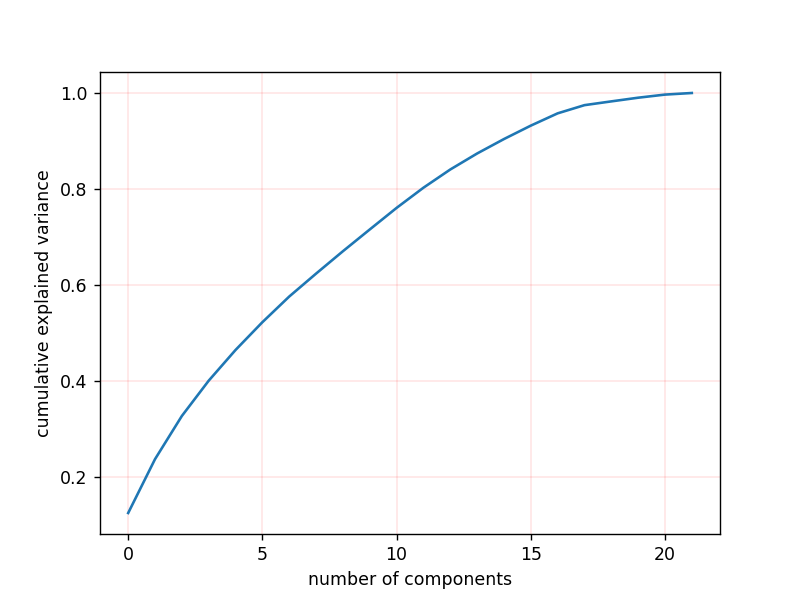

In [66]:
# Chossing the number of components for PCA
plt.figure(1)

pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(b=None, which='both', axis='both', color='r', linestyle='-', linewidth=.1)
plt.show()
#the first 12 components cantain approximately 90% of the variance

In [30]:
# PCA
pca = PCA(n_components = 12)
X_2 = pca.fit_transform(X_1)

## DECISION TREE

<IPython.core.display.Javascript object>


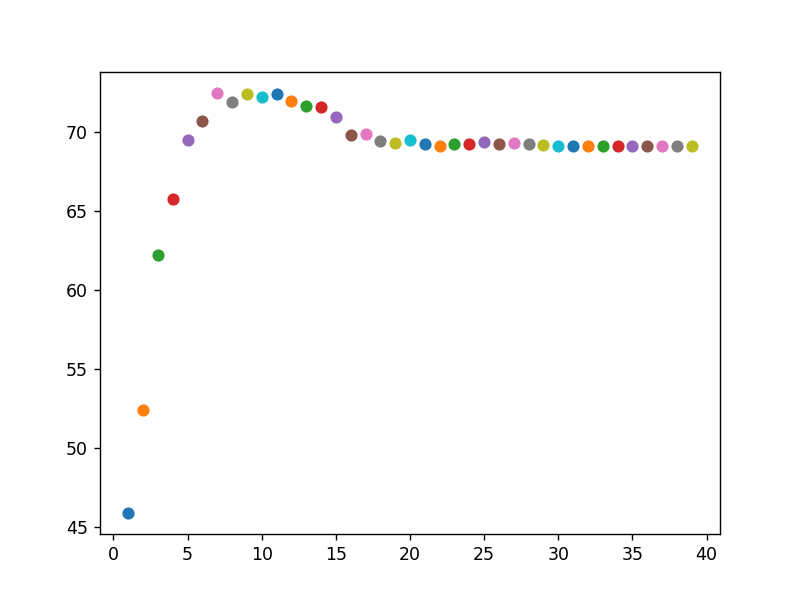

45.872652922957805
52.38663859852883
62.17564363143631
65.7625580720093
69.4542440960124
70.70775261324042
72.44991289198606
71.89157471931861
72.41446476964771
72.20576848625629
72.41494870305847
71.92726480836237
71.64864014711576
71.57895373596592
70.91669086333721
69.76734901277585
69.8717576461479
69.41927990708477
69.27942315137437
69.45339721254355
69.20985772357723
69.0702429345722
69.24457994579944
69.24433797909408
69.34886759581882
69.24433797909407
69.31366144018584
69.20949477351917
69.13980836236935
69.10496515679444
69.10496515679444
69.10496515679444
69.10496515679444
69.10496515679444
69.10496515679444
69.10496515679444
69.10496515679444
69.10496515679444
69.10496515679444
###################
Max depth:  7 Accuracy:  72.44991289198606 %


In [49]:
# Searcing for the depth of the tree that returns the best model accuracy

plt.figure(2)
vals=[]
for i in range(1,40):
    tree   = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=1)
    tree.fit(X,y)
    y_pred = tree.predict(X)
    kfold  = KFold(n_splits = 10, shuffle=True, random_state=seed)
    score  = cross_val_score(tree, X, y, cv=kfold)
    mean   = score.mean()*100
    plt.scatter(i,mean)
    print(mean)
    vals.append(mean)
plt.show()

val, idx = max((val, idx) for (idx, val) in enumerate(vals))

print('###################')
print('Max depth: ',idx+1, 'Accuracy: ',val,'%')


In [32]:
# Defining the model with max_depth=7
tree   = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=1)
tree.fit(X, y)
y_pred = tree.predict(X)

# Evaluation procedure
kfold  = KFold(n_splits = 10, shuffle=True, random_state=seed)

# cross validation
score  = cross_val_score(tree, X, y, cv=kfold)
mean   = score.mean()*100
print('mean accuracy is %.2f%% (std deviation %.2f%%)' % (score.mean()*100, score.std()*100)) 


mean accuracy is 72.45% (std deviation 3.79%)


In [33]:
# Finding the 3 most imortant features
importance  = tree.feature_importances_
column_names = X.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importances)):
    if ii <3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])

print('The 3 most important featuires in decision tree model are: '+str(important_features))

The 3 most important featuires in decision tree model are: ['Road Surface_Wet or Damp', 'Road Surface_Dry', 'Age of Casualty']


In [34]:
importances

{0.07046613573744442: 'Number of Vehicles',
 0.13569340994053766: 'Age of Casualty',
 0.014131461995591777: 'Day_weekend',
 0.01099922090091862: 'Time (24hr)_Night-time',
 0.1464899450654288: 'Road Surface_Dry',
 0.0038589766550617484: 'Road Surface_Flood (surface water over 3cm deep)',
 0.011277629989697863: 'Road Surface_Frost or Ice',
 0.008838142526296397: 'Road Surface_Snow',
 0.17984124517832464: 'Road Surface_Wet or Damp',
 0.0: 'Weather Conditions_snowing',
 0.0017591975268077178: 'Weather Conditions_other',
 0.011698107655627692: 'Weather Conditions_raining',
 0.06702378723325951: 'Casualty Class_Driver',
 0.07231646317432036: 'Casualty Class_Passenger',
 0.09442284343870937: 'Casualty Class_Pedestrian',
 0.012046960684775058: 'Sex of Casualty_Male',
 0.008354269443830973: 'Type of Vehicle_bus',
 0.06804952167658344: 'Type of Vehicle_car',
 0.006101481617302803: 'Type of Vehicle_goods vehicle',
 0.04983414873681314: 'Type of Vehicle_motorcycle',
 0.02679705082266794: 'Type of 

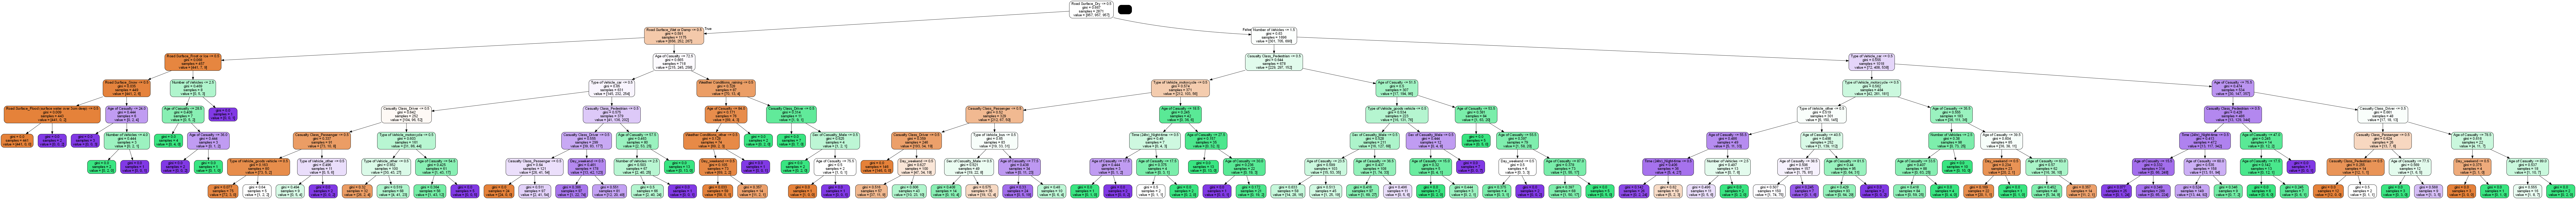

In [35]:
# plottig decision tree
dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           out_file=None,
                           feature_names=list(X))

graph=graph_from_dot_data(dot_data)
graph.write_png('tree.png')

from IPython.display import Image
#Image('tree.png', width=1000)

#plotting decision tree

#Image('tree.png', width=1000, high=1000)
Image('tree.png', width=3000)

## RANDOM FOREST

In [36]:
# Converting column categorical to values
# Where y=='Slight' then 0, else (where y=='Serious'==1, then 2)

y_forest = np.where(y=='Slight', 0, np.where(y=='Serious',1,2))
y_forest = pd.DataFrame(data = y_forest, columns = ['Casualty Severity'])
y_forest.value_counts()

Casualty Severity
0                    957
1                    957
2                    957
dtype: int64

In [37]:
(unique, counts) = np.unique(y_forest, return_counts=True)
frequencies      = np.asarray((unique, counts)).T
frequencies

array([[  0, 957],
       [  1, 957],
       [  2, 957]], dtype=int64)

In [221]:
# Defining the model (1000 trees)

# Criterion = "squared_error  --> mse
# Criterion = "absolute_error --> mae
# n_jobs = number of jobs to be parallelized, -1 for all 
forest = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', random_state=1, n_jobs=-1)
forest.fit(X, y_forest)
y_pred = tree.predict(X)

# Evaluation precedure
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Cross validation
score1 = cross_val_score(forest, X, y_forest, cv=kfold)
print('mean accuracy %.2f%% (std deviation %.2f%%)' % (score1.mean()*100, score1.std()*100))

mean accuracy 65.12% (std deviation 4.79%)


## NEURAL NETWORK

In [39]:
y.value_counts()

Serious    957
Fatal      957
Slight     957
Name: Casualty Severity, dtype: int64

In [40]:
# One hot encoding
encoder   = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

print(encoded_y)
print(encoded_y[10])

# Convert integers to dummy variables (i.e one hot encoded)
dummy_y = utils.np_utils.to_categorical(encoded_y)
dummy_y

[1 1 1 ... 2 2 2]
1


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [45]:
# Defining baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(24, input_dim=12, activation='relu'))
    model.add(Dense(12, input_dim=24, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#“relu” activation function reduces likelihood of vanishing gradient
#using a “softmax” activation function ensuring that the output values are in the range of 0 and 1 and may be used as predicted probabilities
#when using the "categorical_crossentropy" loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample) 
#"Adam" optimizer realizes the benefits of both AdaGrad (Adaptive Gradient Algorithm) and RMSProp (Root Mean Square Propagation)

In [46]:
# Defining classifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
#batch defines the number of samples to work through before updating the internal model parameters
#epoch defines the number of times that the learning algorithm will work through the entire training dataset
#verbose is a general programming term for produce lots of logging output; set to 0 (silent) not to slower the computation

In [47]:
# Cross validation
results = cross_val_score(estimator, X_2, dummy_y, cv = kfold, )
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results.mean()*100, results.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 72.73% (standard deviation 2.48%)


<IPython.core.display.Javascript object>


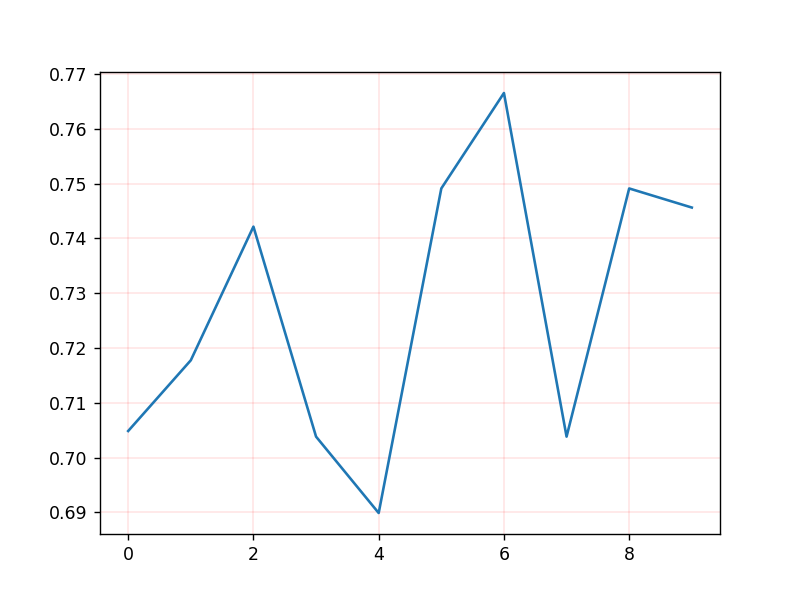

In [73]:
import seaborn as sns
plt.figure(3)
sns.lineplot(data=results)
plt.grid(b=None, which='both', axis='both', color='r', linestyle='-', linewidth=.1)

In [68]:
# No borrar
# https://stackoverflow.com/questions/60867078/how-to-get-training-validation-loss-of-keras-scikit-learn-wrapper-in-cross-val}
# https://stackoverflow.com/questions/58712387/how-can-i-get-the-history-of-the-different-fits-when-using-cross-vaidation-over

## KNN

<IPython.core.display.Javascript object>


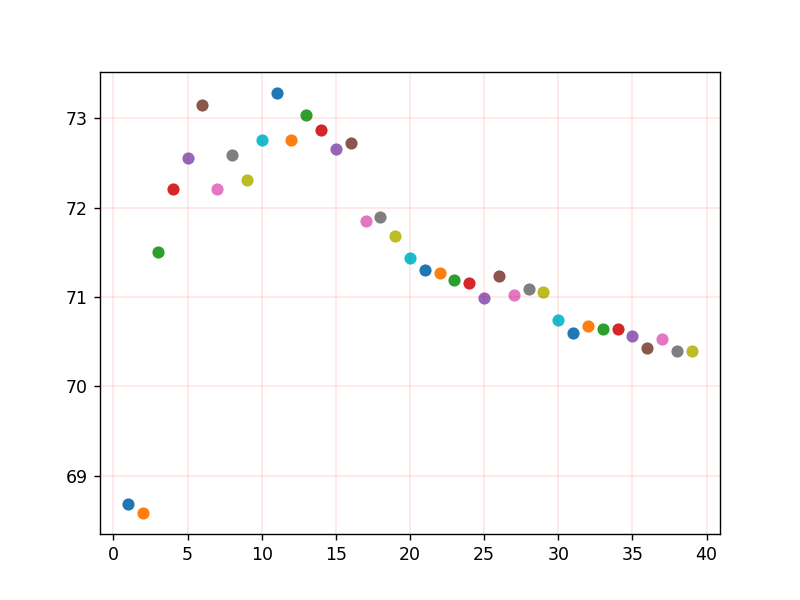

###################
Max depth:  11 Accuracy:  73.28506097560975 %


In [97]:
# SEarching for the number of the neighbors that returns the best model accuracy
plt.figure(4)

vals = []
for i in range(1,40):
    knn      = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    
    knn.fit(X_2, y)
    results3 = cross_val_score(knn, X_2, y, cv=kfold)
    mean     =results3.mean()*100
    plt.scatter(i,mean)
    vals.append(mean)
plt.show()
plt.grid(b=None, which='both', axis='both', color='r', linestyle='-', linewidth=.1)

val, idx = max((val, idx) for (idx, val) in enumerate(vals))
print('###################')
print('Max depth: ',idx+1, 'Accuracy: ',val,'%')

In [76]:
# Defining the model with 11 neighbors
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')
knn.fit(X_2, y)

# Cross validation
results3 = cross_val_score(knn, X_2, y, cv=kfold)
print('Mean accuracy %.2f%% (std deviation %.2f%%)' % (results3.mean()*100, results3.std()*100))
# The results are summarized as both the mean and standard deviation of the model accuracy and the dataset

Mean accuracy 73.29% (std deviation 2.57%)


## LOGISTIC REGRESSION

In [224]:
# Defining the log space Lambda λ param
c_lambda=np.logspace(-1, 4,6)
c_lambda

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

* Using PCA

<IPython.core.display.Javascript object>


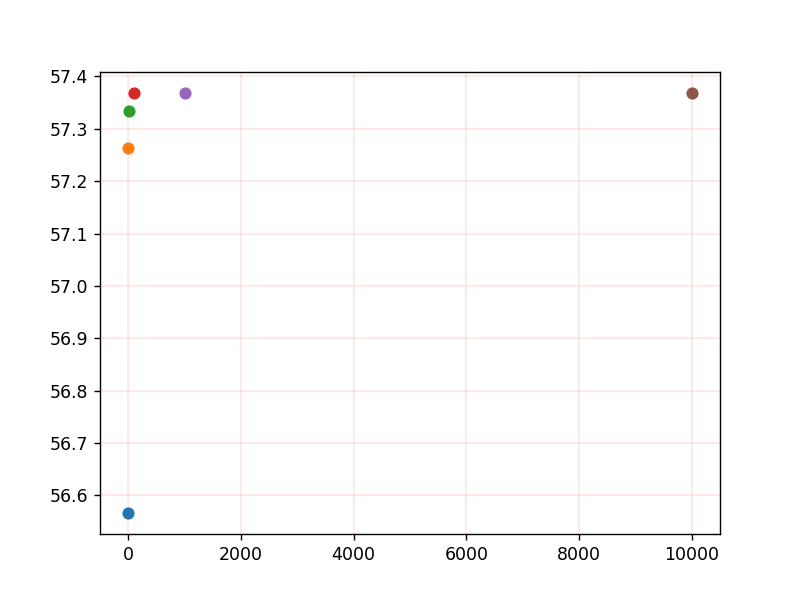

    Lambda   Accuracy
0      0.1  56.566371
1      1.0  57.264082
2     10.0  57.333648
3    100.0  57.368249
4   1000.0  57.368249
5  10000.0  57.368249


In [225]:
plt.figure(5)

n=len(c_lambda)
vals= []
for i in range (n):
    # Defining the model
    lr= LogisticRegression(C=c_lambda[i], random_state=1)
    lr.fit(X_2, y)
    
    # Cross Validation
    results1 = cross_val_score(lr, X_2, y, cv=kfold)
    mean     =results1.mean()*100
    plt.scatter(c_lambda[i],mean)
    vals.append(mean)

plt.show()
plt.grid(b=None, which='both', axis='both', color='r', linestyle='-', linewidth=.1)
Param0=pd.DataFrame(c_lambda, columns=['Lambda']) 
Param0['Accuracy']=vals
print(Param0)

val, idx = max((val, idx) for (idx, val) in enumerate(vals))

In [150]:
print('###################')
print('Optimal λ [C]: ',c_lambda[3], 'Accuracy: ',val,'%')

###################
Optimal λ [C]:  100.0 Accuracy:  57.36824912891986 %


* Without PCA

In [152]:
X

,Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Dry,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,Weather Conditions_fine,...,Weather Conditions_snowing,Casualty Class_Driver,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle,Type of Vehicle_other
0,1,19,1,1,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,1,19,1,1,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
2,1,21,1,1,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3,2,60,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,2,41,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,2,22,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1910,2,23,0,1,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
1911,3,62,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1912,2,21,0,1,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [153]:
# Dropping reference variables
X_3 = X.drop(['Road Surface_Dry', 'Weather Conditions_fine', 'Casualty Class_Driver', 'Type of Vehicle_other'], axis=1)
X_3

,Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,Weather Conditions_other,Weather Conditions_raining,Weather Conditions_snowing,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle
0,1,19,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,19,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,1,21,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,2,60,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2,41,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,2,22,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1910,2,23,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1911,3,62,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1912,2,21,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0


<IPython.core.display.Javascript object>


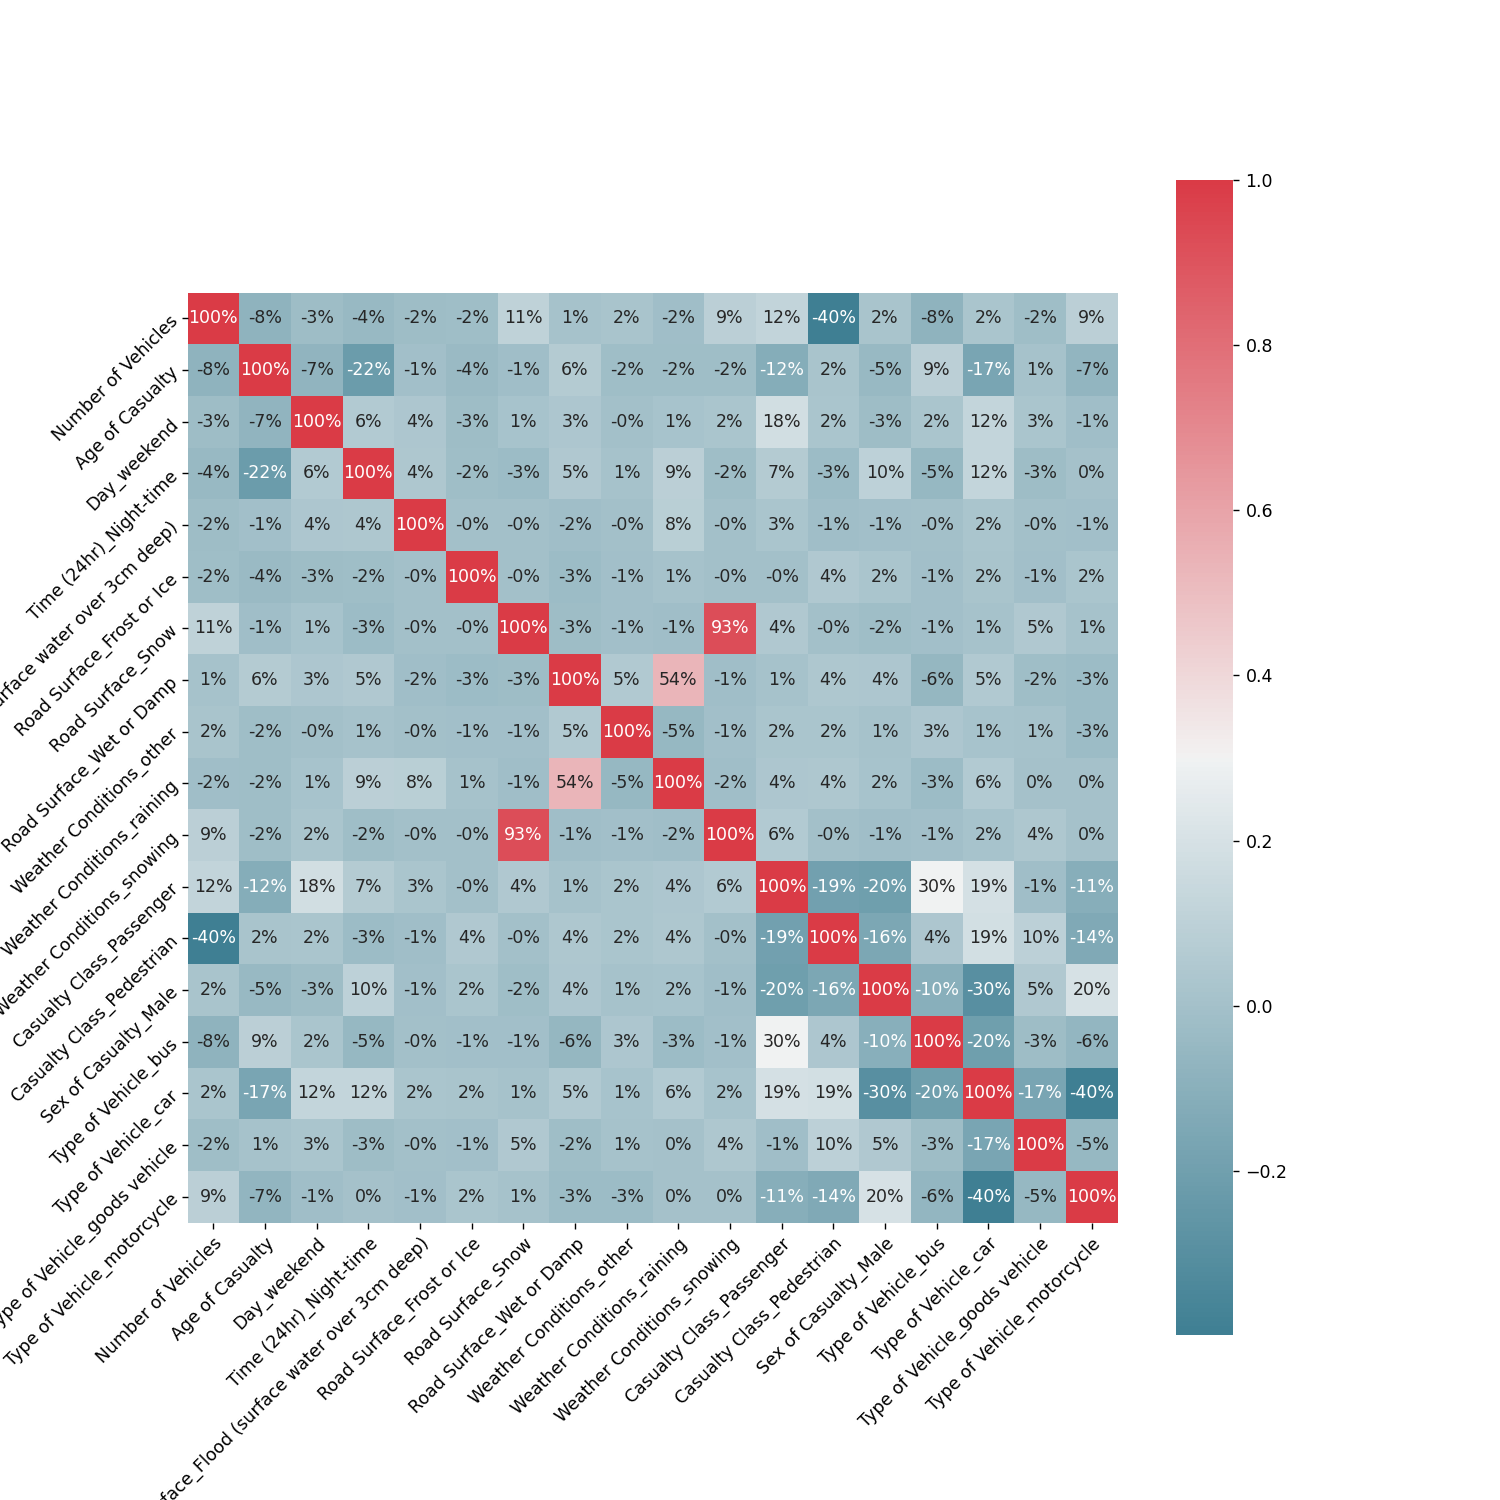

In [231]:
# Correlation matrix
corr  = X_3.corr()

f, ax = plt.subplots(num=6,figsize=(12, 12))
ax    = sns.heatmap(corr, annot=True, fmt ='.0%', mask= np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()



In [184]:
s = corr.unstack()
so=s.sort_values(ascending = False,kind="quicksort")
so[17:30]


Type of Vehicle_motorcycle  Type of Vehicle_motorcycle    1.000000
Road Surface_Snow           Weather Conditions_snowing    0.925659
Weather Conditions_snowing  Road Surface_Snow             0.925659
Road Surface_Wet or Damp    Weather Conditions_raining    0.535230
Weather Conditions_raining  Road Surface_Wet or Damp      0.535230
Type of Vehicle_bus         Casualty Class_Passenger      0.296434
Casualty Class_Passenger    Type of Vehicle_bus           0.296434
Type of Vehicle_motorcycle  Sex of Casualty_Male          0.199937
Sex of Casualty_Male        Type of Vehicle_motorcycle    0.199937
Type of Vehicle_car         Casualty Class_Passenger      0.186537
Casualty Class_Passenger    Type of Vehicle_car           0.186537
Casualty Class_Pedestrian   Type of Vehicle_car           0.185262
Type of Vehicle_car         Casualty Class_Pedestrian     0.185262
dtype: float64

<IPython.core.display.Javascript object>


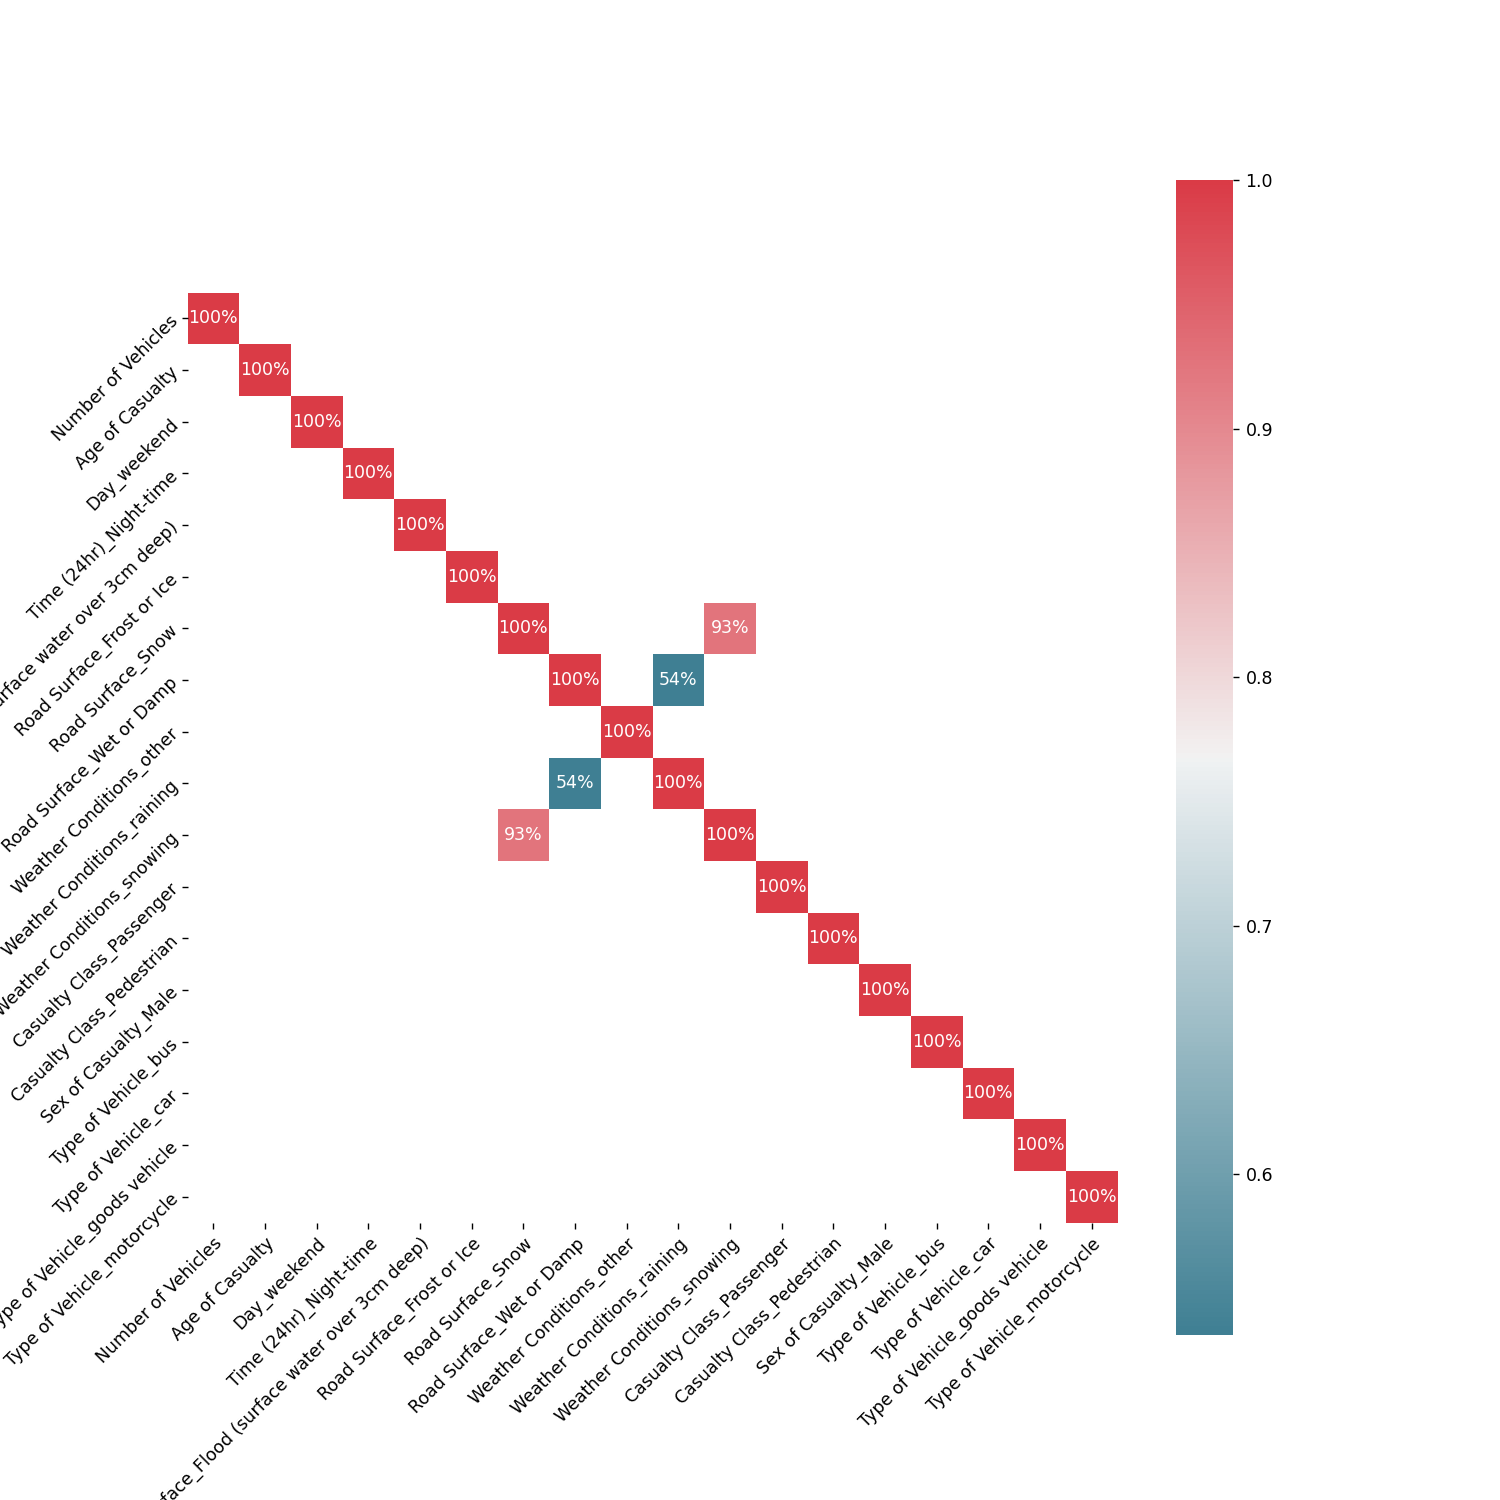

In [232]:
kot = corr[corr>=.5]

f, ax = plt.subplots(num=7,figsize=(12, 12))
ax    = sns.heatmap(kot, annot=True, fmt ='.0%', mask= np.zeros_like(kot, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [204]:
# Dropping highly  correlated variables
X_4 = X_3.drop(['Weather Conditions_other',
 'Weather Conditions_raining',
 'Weather Conditions_snowing'], axis=1)

<IPython.core.display.Javascript object>


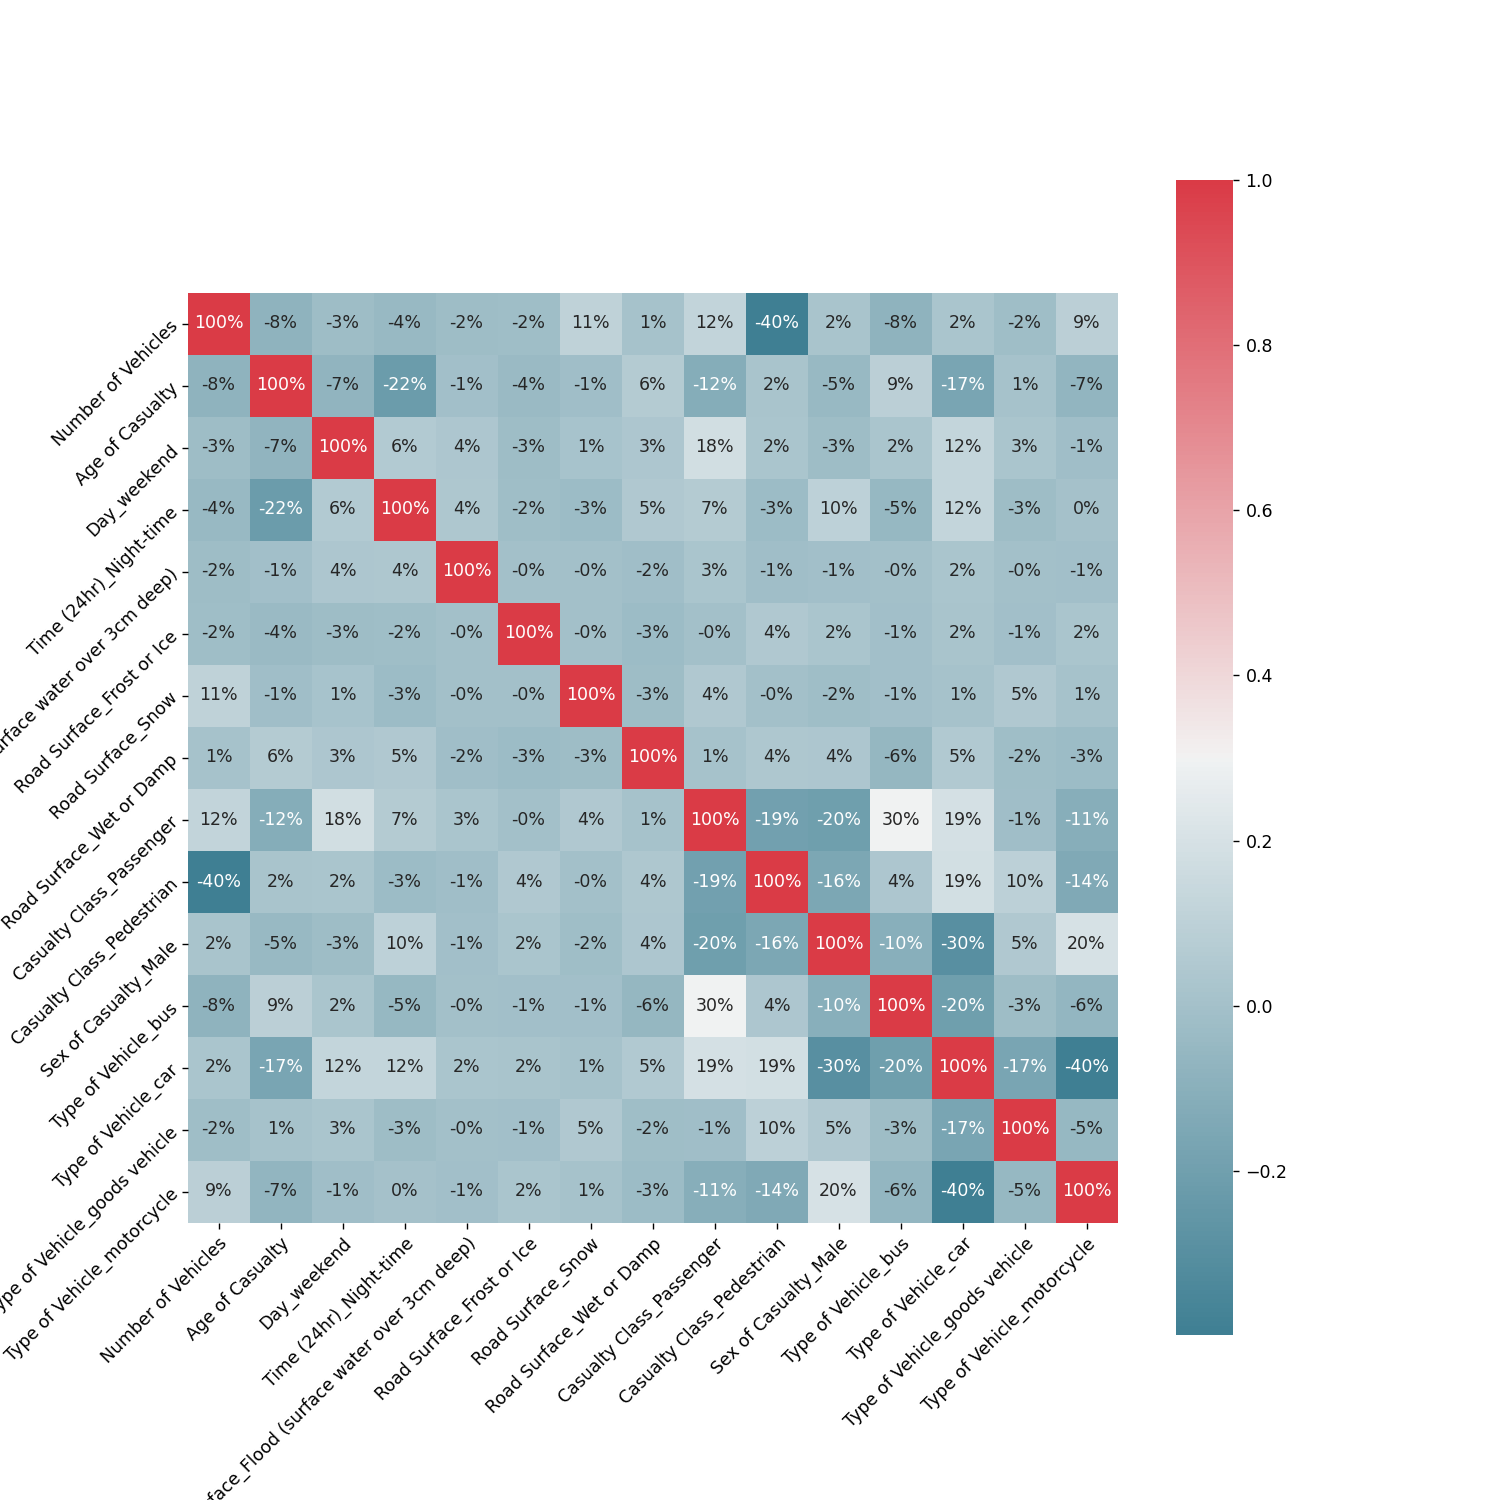

In [295]:
# Correlation matrix
f, ax = plt.subplots(num=9,figsize=(12, 12))
corr = X_4.corr()
ax = sns.heatmap(corr, annot=True, fmt ='.0%', mask= np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [217]:
# Defining model
c_lambda=100
lr = LogisticRegression(C=c_lambda, random_state=1)
lr.fit(X_4, y)

# Cross validation
results2 = cross_val_score(lr, X_4, y, cv=kfold)
print('Mean accuracy %.2f%% (std deviation %.2f%%)' % (results2.mean()*100, results2.std()*100))

Mean accuracy 61.34% (std deviation 2.77%)


In [218]:
# Display coefficients
coef  = lr.coef_[0]
table = [coef]
display(HTML(tabulate.tabulate(table, headers=list(X_4), tablefmt='html')))

Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle
-1.43831,0.00783064,-0.530309,0.0494173,-0.0565653,-0.159922,-0.0562659,-0.096954,-1.18034,-1.70835,-0.0527139,-1.34568,-0.389245,-1.03867,-1.02768


## SVM

In [ ]:
f, ax = plt.subplots(num=10,figsize=(12, 12))
vals=[]



In [277]:
# Defining the log space Lambda λ param
gamma  = np.logspace(-4, 2,7)
c_list = [0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000]

ng=len(gamma)
nc=len(c_list)

print(list(gamma))
print(c_list)

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
[0.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000]


In [274]:
svm_mean = np.zeros([ng,nc])
svm_std  = np.zeros([ng,nc])
svm_std

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [332]:
i = 0

for gamma_val in gamma_list:
    j = 0
    
    for c_val in c_list:
        SVM = SVC(C=c_val, gamma=gamma_val)
              
        SVM.fit(X, y)
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        score = cross_val_score(SVM, X, y, cv=kfold)
        mean = score.mean()*100
        std  = score.std()*100
        
        svm_mean[i,j] = mean
        svm_std[i,j]  = std
        j+=1
    i+=1

<IPython.core.display.Javascript object>


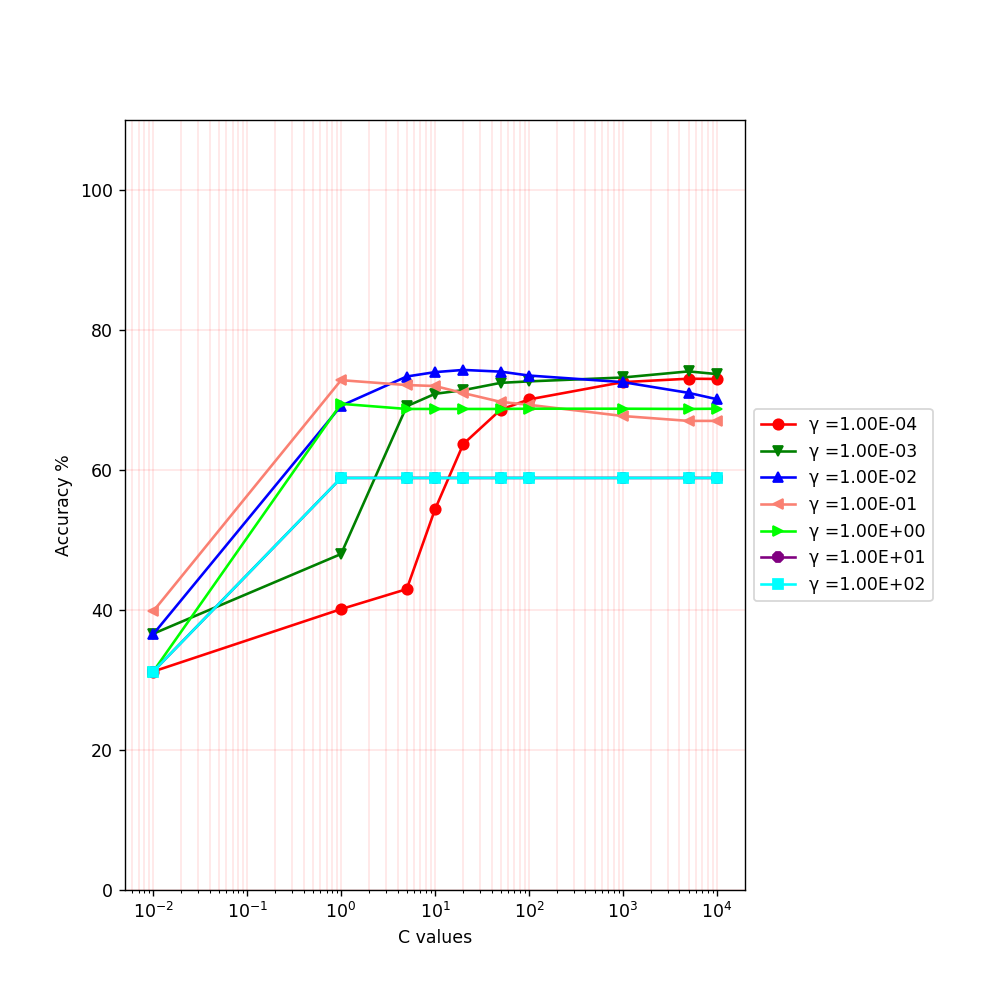

In [347]:
f, ax = plt.subplots(num=11,figsize=(8, 8))

markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h']
colors = ['r', 'g', 'b', 'salmon', 'lime', 'purple', 'cyan', 'gold', 'peru', 'gray']

for i in range(ng):
    #plt.semilogx(c_list, svm_mean.T)

    lbl ='\N{greek small letter gamma}'+' =' + str('%.2E' % Decimal(gamma[i]))
    #plt.semilogx(c_list, svm_mean[i,:], marker=markers[i], color=colors[i],label=lbl)
    plt.plot(c_list, svm_mean[i,:], marker=markers[i], color=colors[i],label=lbl)

plt.legend(str(gamma_list[:]))
plt.xlabel('C values')
plt.ylabel('Accuracy %')
plt.ylim(0,110)
plt.xscale('log')
plt.grid(b=None, which='both', axis='both', color='r', linestyle='-', linewidth=.1)


# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

## SUMMARY

In [348]:
# Defining the model
SVM = SVC(C=c_val, gamma=gamma_val)
              
SVM.fit(X, y)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
score = cross_val_score(SVM, X, y, cv=kfold)
svm_mean_ = score.mean()*100
svm_std_  = score.std()*100

print('Mean accuracy %.2f%% (std deviation %.2f%%)' % (svm_mean_, svm_std_))

Mean accuracy 58.86% (std deviation 2.99%)


In [351]:
table = [["Decision Tree",round(score.mean()*100,2),round(score.std()*100,2)],
         ["Random Forest",round(score1.mean()*100,2),round(score1.std()*100,2)],
         ["Neural Network",round(results.mean()*100,2),round(results.std()*100,2)],
         ["KNN",round(results3.mean()*100,2) , round(results3.std()*100,2)],
         ["Logistic Regression with PCA", round(results1.mean()*100,2) , round(results1.std()*100,2)],
         ["Logistic Regression without PCA", round(results2.mean()*100,2) , round(results2.std()*100,2)],
         ['SVM', round(svm_mean_,2), round(svm_std_,2)]]

display(HTML(tabulate.tabulate(table, headers=["Algorithm","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

Algorithm,Mean Accuracy,Standard Deviation
Decision Tree,58.86,2.99
Random Forest,65.12,4.79
Neural Network,72.73,2.48
KNN,70.39,2.99
Logistic Regression with PCA,57.37,2.99
Logistic Regression without PCA,61.34,2.77
SVM,58.86,2.99
